In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from matplotlib import cm
import seaborn as sns

0. Сбор датасета и беглый анализ фичей

In [2]:
data = pd.read_csv('u.data', sep = '\t', header = None) #информация по тому когда какую оценку поставил юзер
user = pd.read_csv('u.user', sep = '|', header = None) #информация о юзере
data.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']

In [3]:
#сами фильмы
item = pd.read_csv('u.item', sep = '|', header = None, encoding='latin-1')
item.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data = (pd.merge(data, user)).merge(item)
data.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie_title', 'release_date',
       'video_release_date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [6]:
data.shape

(100000, 31)

In [7]:
# data['movie title'].value_counts()
# data.columns
# data['user id'].value_counts()

movie_title
Independence Day (ID4) (1996)    429
Air Force One (1997)             431
Toy Story (1995)                 452
Scream (1996)                    478
English Patient, The (1996)      481
Liar Liar (1997)                 485
Return of the Jedi (1983)        507
Fargo (1996)                     508
Contact (1997)                   509
Star Wars (1977)                 583
dtype: int64

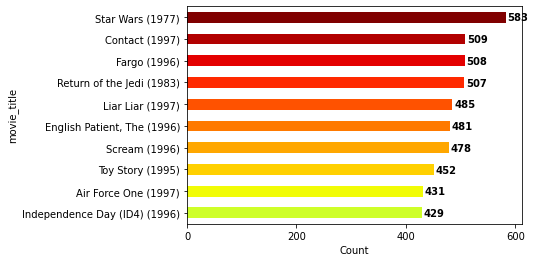

In [8]:
# Самые топ-рейтинг фил
fig1=plt.figure()
top_10_rated = data.groupby('movie_title').size().sort_values()[-10:]
display(top_10_rated)

top_10_rated.plot(kind = 'barh', color = [ cm.jet(x) for x in np.linspace(0.6, 1, 10) ])
for i, v in enumerate(top_10_rated):
    plt.text(v + 3, i-0.15 , str(v), color='black', fontweight='bold')
plt.xlabel('Count')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.show()

Мда, ну тут все фильмы с высокой оценкой - бумерские (< 2000), может быть из-за специфики начала сбора данных. Если посмотреть на возврастное распределение, возможно это подвердится: 

/Users/vladislav/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


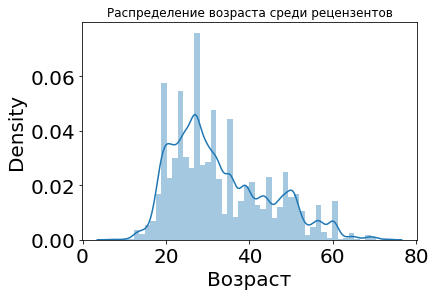

In [9]:
sns.distplot(data.age)
plt.xlabel("Возраст")
plt.title("Распределение возраста среди рецензентов")
plt.show()

In [10]:
data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie_title', 'release_date',
       'video_release_date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [11]:
# num_users = data['user_id'].nunique()
# num_items = data['movie_id'].nunique()
# print("number of unique users:", num_users)
# print("number of unique items:", num_items)

In [12]:
# user_item_matrix = np.zeros((num_users, num_items))
# for row in data.itertuples():
#     user, movie, rating = row.user_id, row.movie_id, row.rating
#     user_item_matrix[user-1, movie-1] = rating

In [13]:
# user_item_matrix = user_item_matrix / np.sum(user_item_matrix, axis=1)[:, np.newaxis]
# user_item_matrix = user_item_matrix.T
# damping_factor = 0.85
# user_item_matrix = damping_factor * user_item_matrix + (1 - damping_factor) / num_items

In [14]:
# num_iterations = 100
# error_threshold = 0.001

In [15]:
# pr_vector = np.ones(num_items) / num_items
# prev_pr_vector = np.zeros(num_items)
# for i in range(num_iterations):
#     prev_pr_vector = pr_vector.copy()
#     pr_vector = user_item_matrix.T.dot(prev_pr_vector)
#     if np.linalg.norm(pr_vector - prev_pr_vector) < error_threshold:
#         break

In [16]:
import networkx as nx

In [17]:
G = nx.Graph()

G.add_nodes_from(data['movie_id'].unique())
for user, movie_group in data.groupby('user_id'):
    movie_group = movie_group['movie_id']
    for movie1, movie2 in zip(movie_group, movie_group.shift(-1).dropna()):
        if not G.has_edge(movie1, movie2):
            G.add_edge(movie1, movie2)

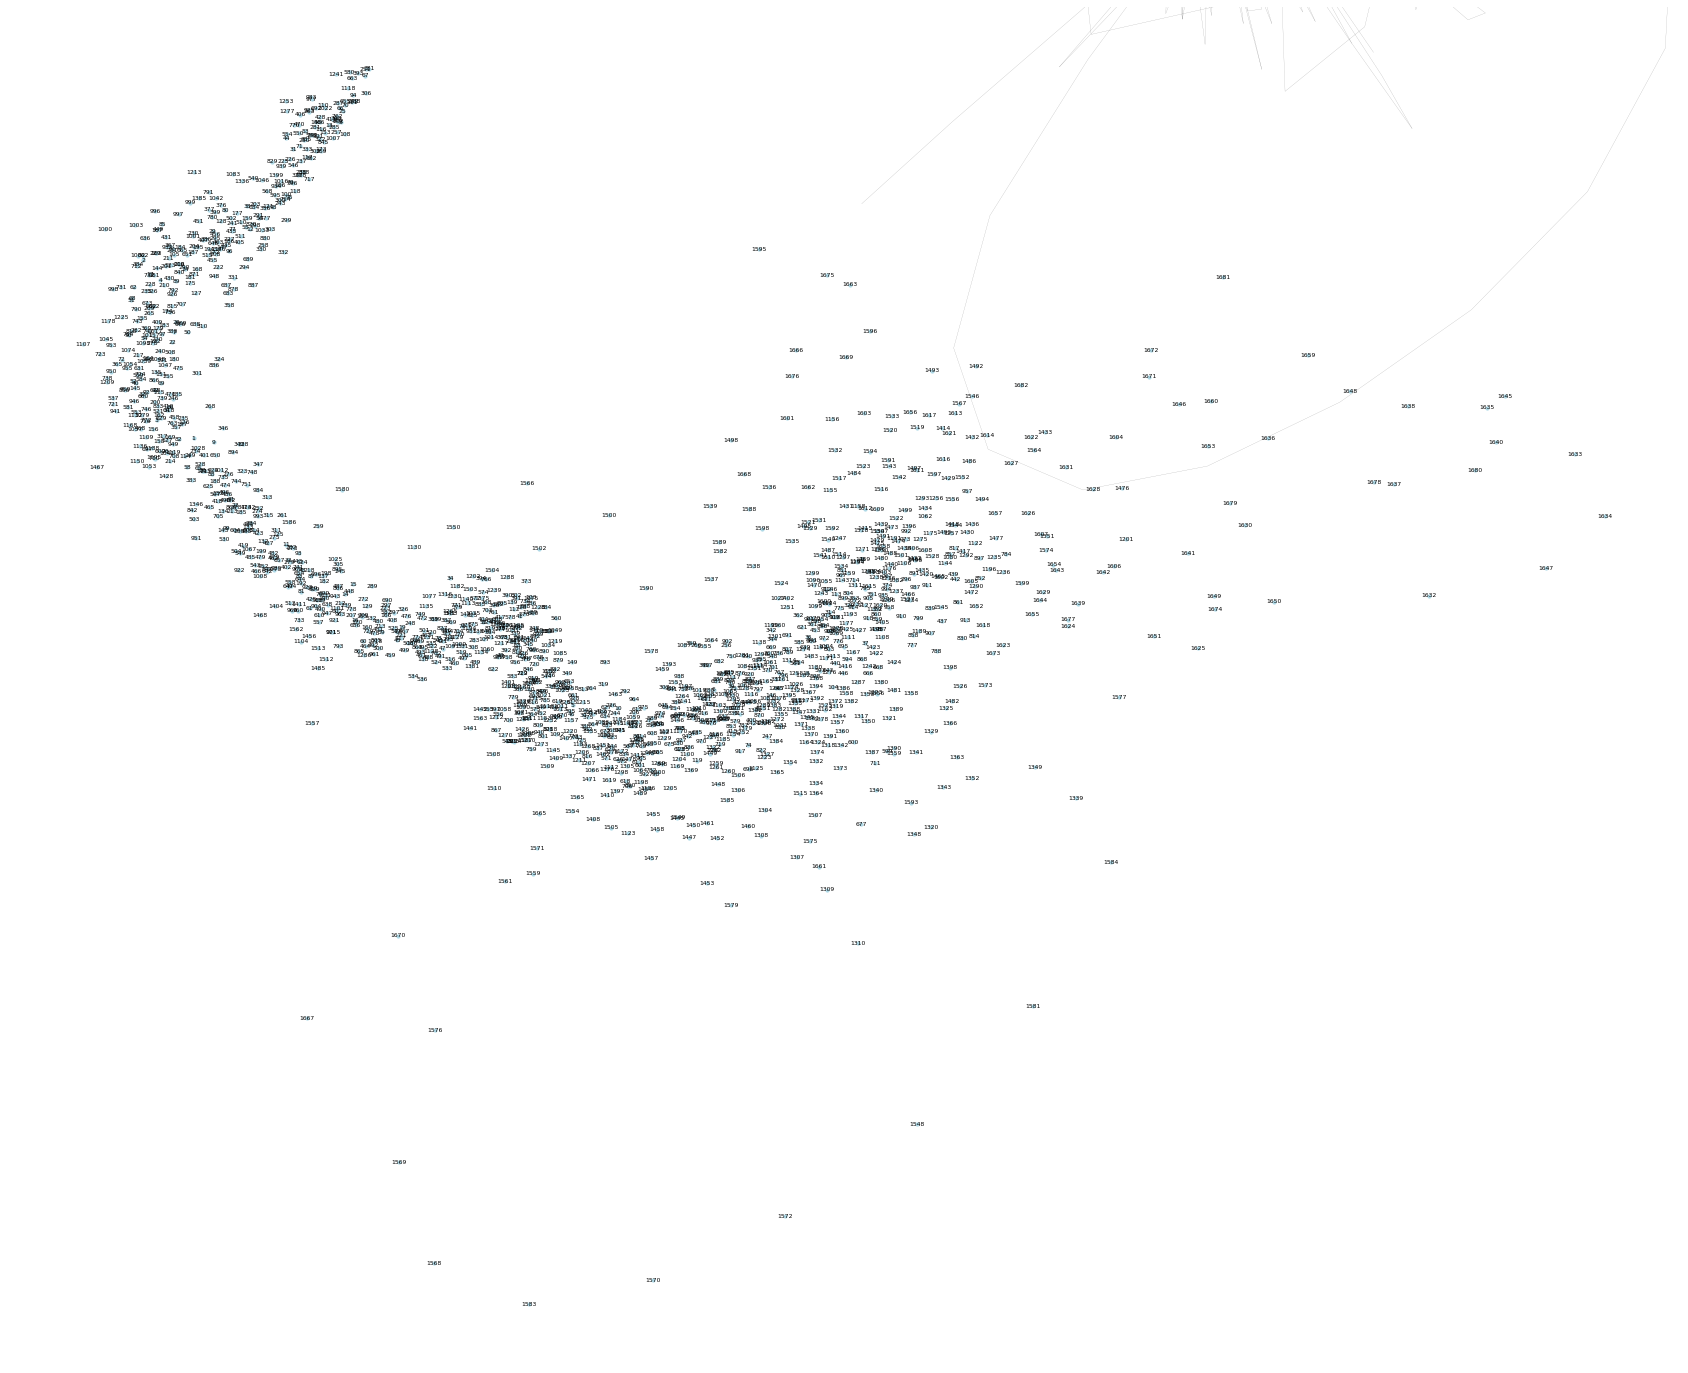

In [18]:
plt.figure(figsize=(30, 25))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')
plt.axis('off')
plt.show()

### Personalized PageRank

In [152]:
from sklearn.model_selection import train_test_split
from networkx.algorithms import bipartite
from tqdm import tqdm
import matplotlib.pyplot as plt
import recmetrics

In [20]:
train, test = train_test_split(data, test_size=0.2, random_state=42)


edges = []
users = set()
movies = set()
for index, row in train.iterrows():
    user, movie = row["user_id"] + 1000000, row["movie_id"] # чтобы не было пересечений в айдишниках сделаем шифт у юзеров
    edges.append((user, movie, row["rating"]))
    users.add(user)
    movies.add(movie)
    

user_movie_graph_train = nx.Graph()   
user_movie_graph_train.add_nodes_from(list(users) + list(movies))
user_movie_graph_train.add_weighted_edges_from(edges)
movie_movie_graph_train = bipartite.weighted_projected_graph(user_movie_graph_train, list(movies), ratio=True)

In [154]:
class PersonalizedPageRankRecSys:
    def __init__(self, user_movie_graph, movie_movie_graph, movies):
        self.user_movie_graph = user_movie_graph
        self.movie_movie_graph = movie_movie_graph
        self.movies = movies
    
    def create_preference_vector(self, user_id):
        if user_id not in self.user_movie_graph.nodes():
            return None
        
        edges = {m: w for _, m, w in self.user_movie_graph.edges(user_id, data="weight")}
        total = sum(edges.values())
        
        if total > 0:
            return {movie: edges.get(movie, 0) / total for movie in self.movies}
        else:
            return {movie: 1 for movie in self.movies}

    def recommend(self, user_id):
        p_vec = self.create_preference_vector(user_id)
        
        if p_vec is None:
            pr = nx.pagerank(self.movie_movie_graph)
        else:
            pr = nx.pagerank(self.movie_movie_graph, personalization=p_vec)

        sorted_nodes = sorted(pr.items(), key=lambda x: x[1], reverse=True)

        if p_vec is None:
            recommended_nodes = [(node, score) for node, score in sorted_nodes]
        else:
            recommended_nodes = [(node, score) for node, score in sorted_nodes if node not in self.user_movie_graph[user_id]]
            
        return recommended_nodes
    


def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.

    This function computes the average prescision at k between two lists of
    items.

    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The average precision at k over the input lists

    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.

    This function computes the mean average prescision at k between two lists
    of lists of items.

    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The mean average precision at k over the input lists

    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [134]:
recsys = PersonalizedPageRankRecSys(user_movie_graph_train, movie_movie_graph_train, movies)

In [135]:
users_movies_test = dict()

for index, row in test.iterrows():
    user, movie = row["user_id"] + 1000000, row["movie_id"] # чтобы не было пересечений в айдишниках сделаем шифт у юзеров
    if user in users_movies_test:
        users_movies_test[user].append(movie)
    else:
        users_movies_test[user] = [movie]

In [136]:
users_movies_pred = dict()
users_to_predict = [1000001 + i for i in range(50)]

for user in tqdm(users_to_predict):
    users_movies_pred[user] = recsys.recommend(user)[:100]

100%|██████████| 50/50 [10:58<00:00, 13.17s/it]


In [141]:
MAP = []
MAR = []

for k in range(1, 100):
    y_true = []
    y_pred = []
    for user in users_to_predict:
        true = users_movies_test[user]
        pred = [p[0] for p in users_movies_pred[user]][:k]

        y_true.append(true)
        y_pred.append(pred)

    MAR.append(recmetrics.mark(y_true, y_pred, k = k))
    MAP.append(mapk(y_true, y_pred, k = k))

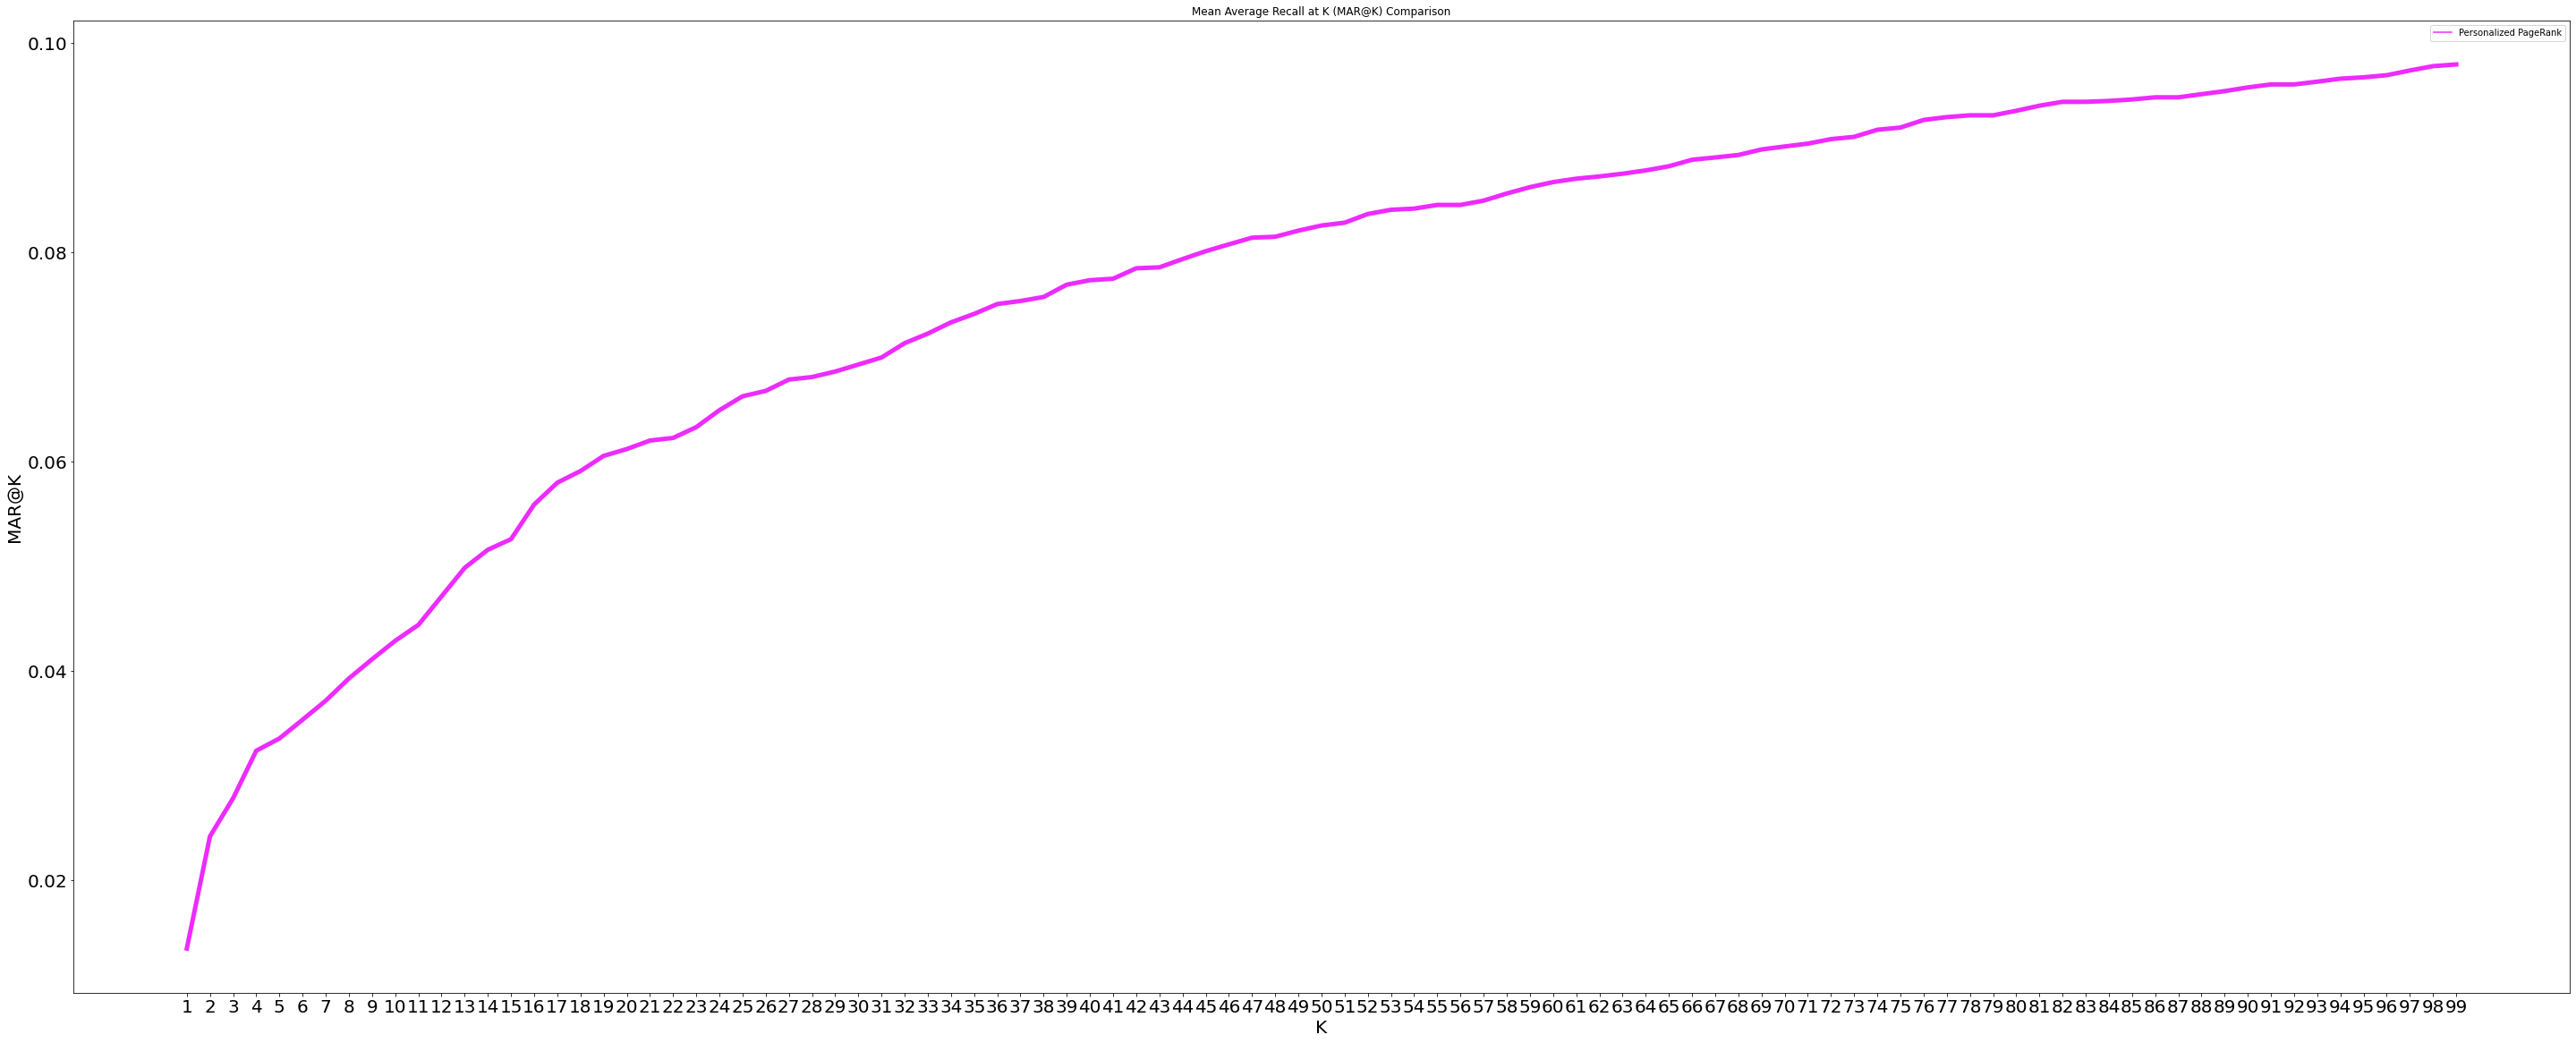

In [151]:
plt.figure(figsize=(50, 20))
recmetrics.mark_plot([MAR], ["Personalized PageRank"], range(1, 100))

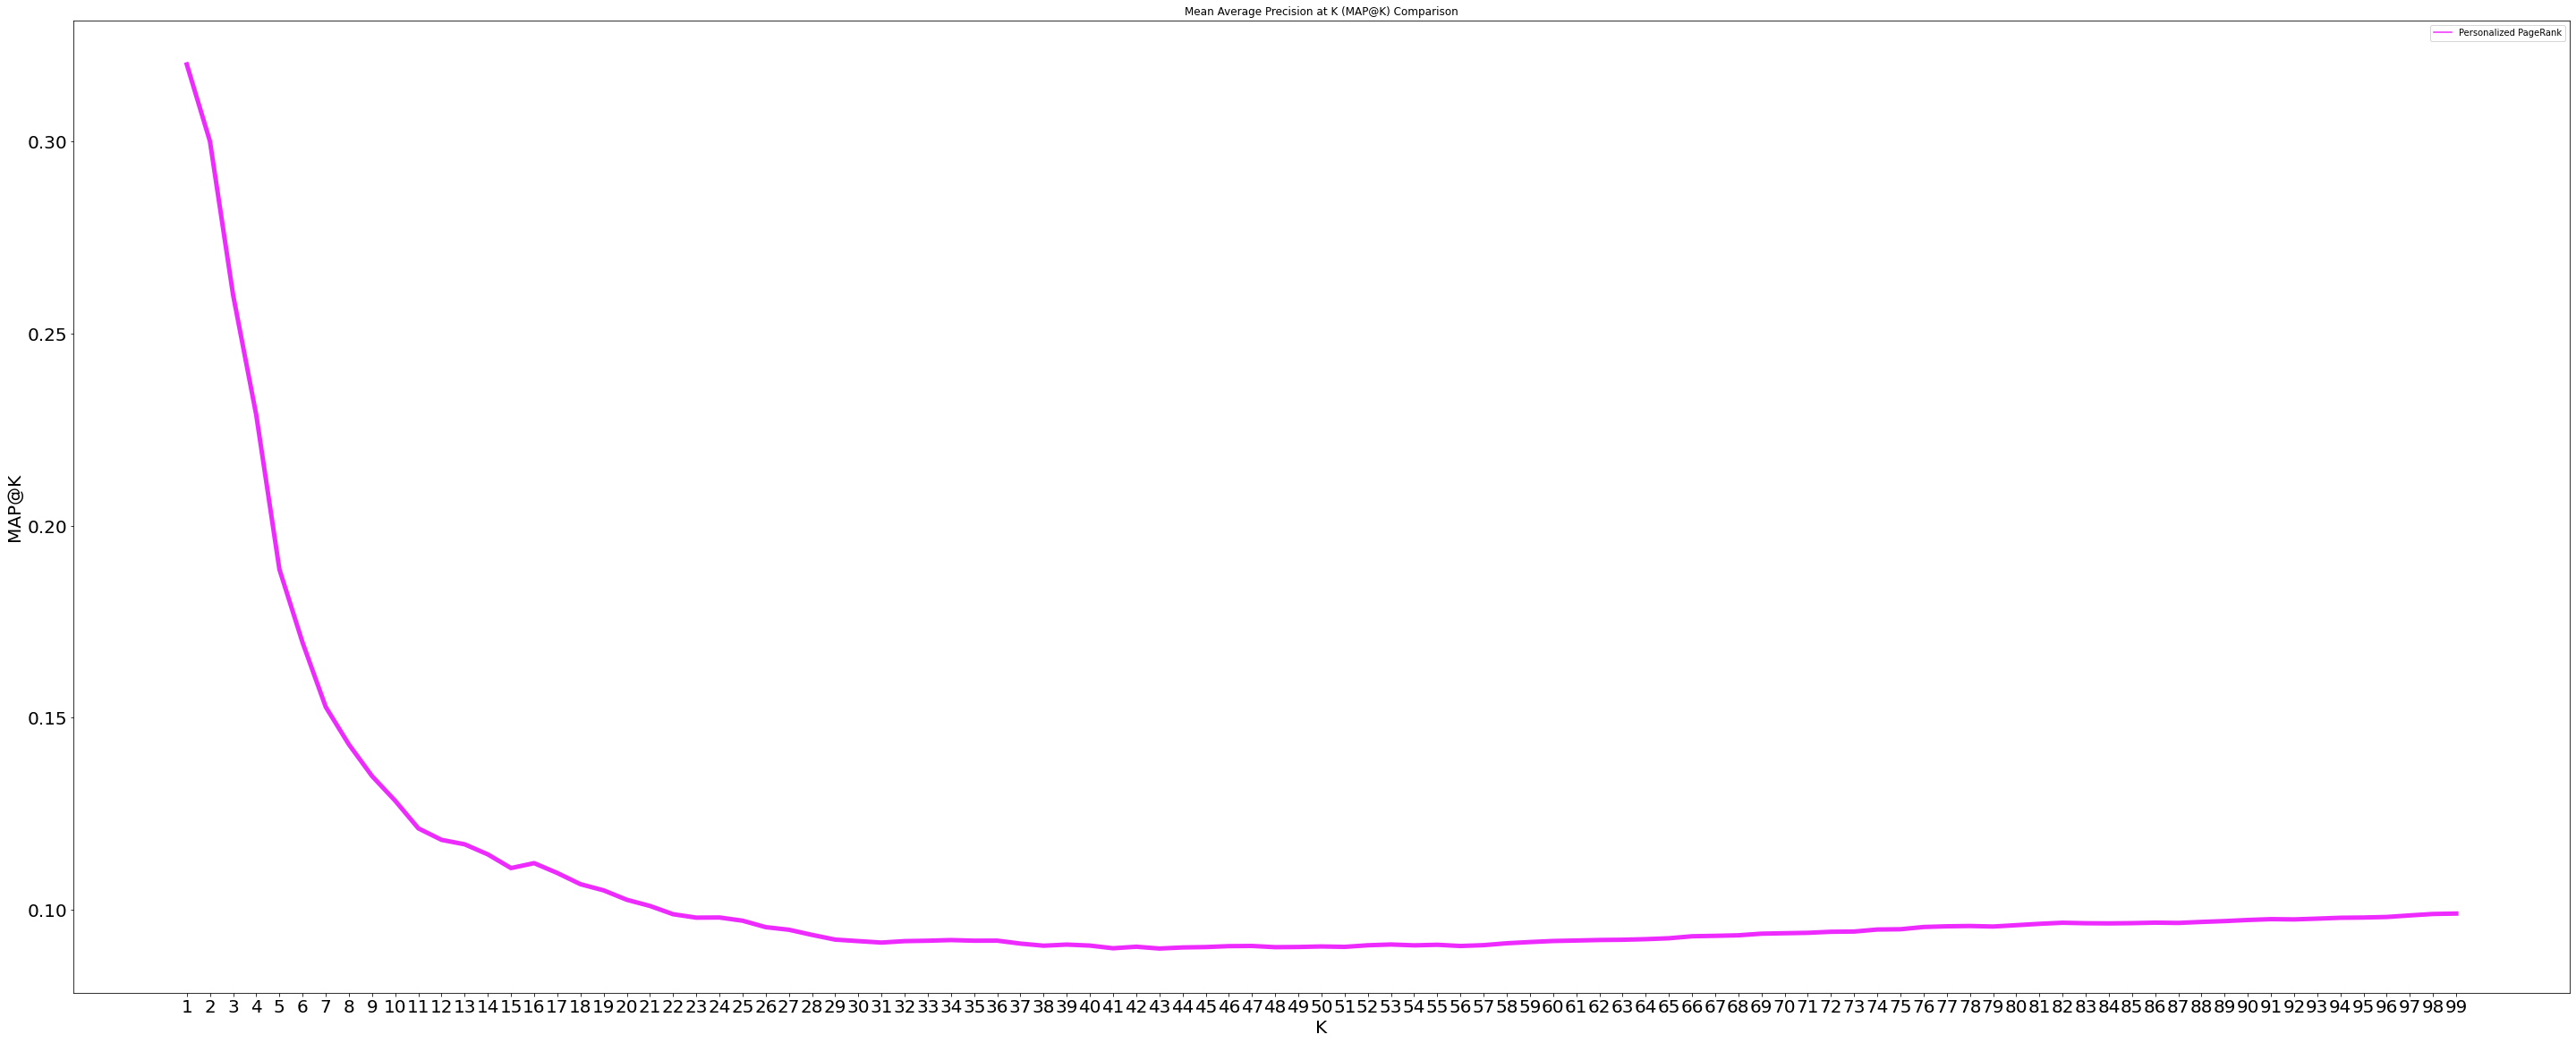

In [150]:
plt.figure(figsize=(50, 20))
recmetrics.mapk_plot([MAP], ["Personalized PageRank"], range(1, 100))